# Data Importation

In [21]:
%run -i bestestimator.py

In [39]:
import sklearn
import pandas 
import xgboost
import numpy

print('Pandas version :', pandas.__version__)
print('Sklearn version :', sklearn.__version__)
print('Xgboost version :', xgboost.__version__)
print('Numpy version :', numpy.__version__)

Pandas version : 0.23.4
Sklearn version : 0.20.1
Xgboost version : 0.82
Numpy version : 1.15.4


In [2]:
Multi_Train = pd.read_csv(r"C:\Users\jecombe\OneDrive - Capgemini\Notebooks\Train.csv", sep = ',')
Multi_Target = pd.read_csv(r"C:\Users\jecombe\OneDrive - Capgemini\Notebooks\Target.csv", sep = ';')

Bin_Train = pd.read_csv(r"C:\Users\jecombe\OneDrive - Capgemini\Notebooks\Train1.csv", sep = ';')
target = pd.read_csv(r"C:\Users\jecombe\OneDrive - Capgemini\Notebooks\Target1.csv", sep = ';')

Bin_Target = pd.DataFrame()
Bin_Target['ID'] = target['ID']
Bin_Target['Target'] = [np.nan]*target.shape[0]


for i in range(target.shape[0]):
    if target['Target'][i] == 1:
        Bin_Target['Target'][i] ='+'
    else :
        Bin_Target['Target'][i] ='-'

Reg_Train = pd.read_csv(r"C:\Users\jecombe\OneDrive - Capgemini\Notebooks\input_training.csv", sep = ';')
Reg_Target = pd.read_csv(r"C:\Users\jecombe\OneDrive - Capgemini\Notebooks\Target_Engie.csv", sep = ';')

bestestimator.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
C:\Users\jecombe\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


# Tests

### Multi Catégorielle

In [22]:
Multi = BestEstimator()

C:\Users\jecombe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


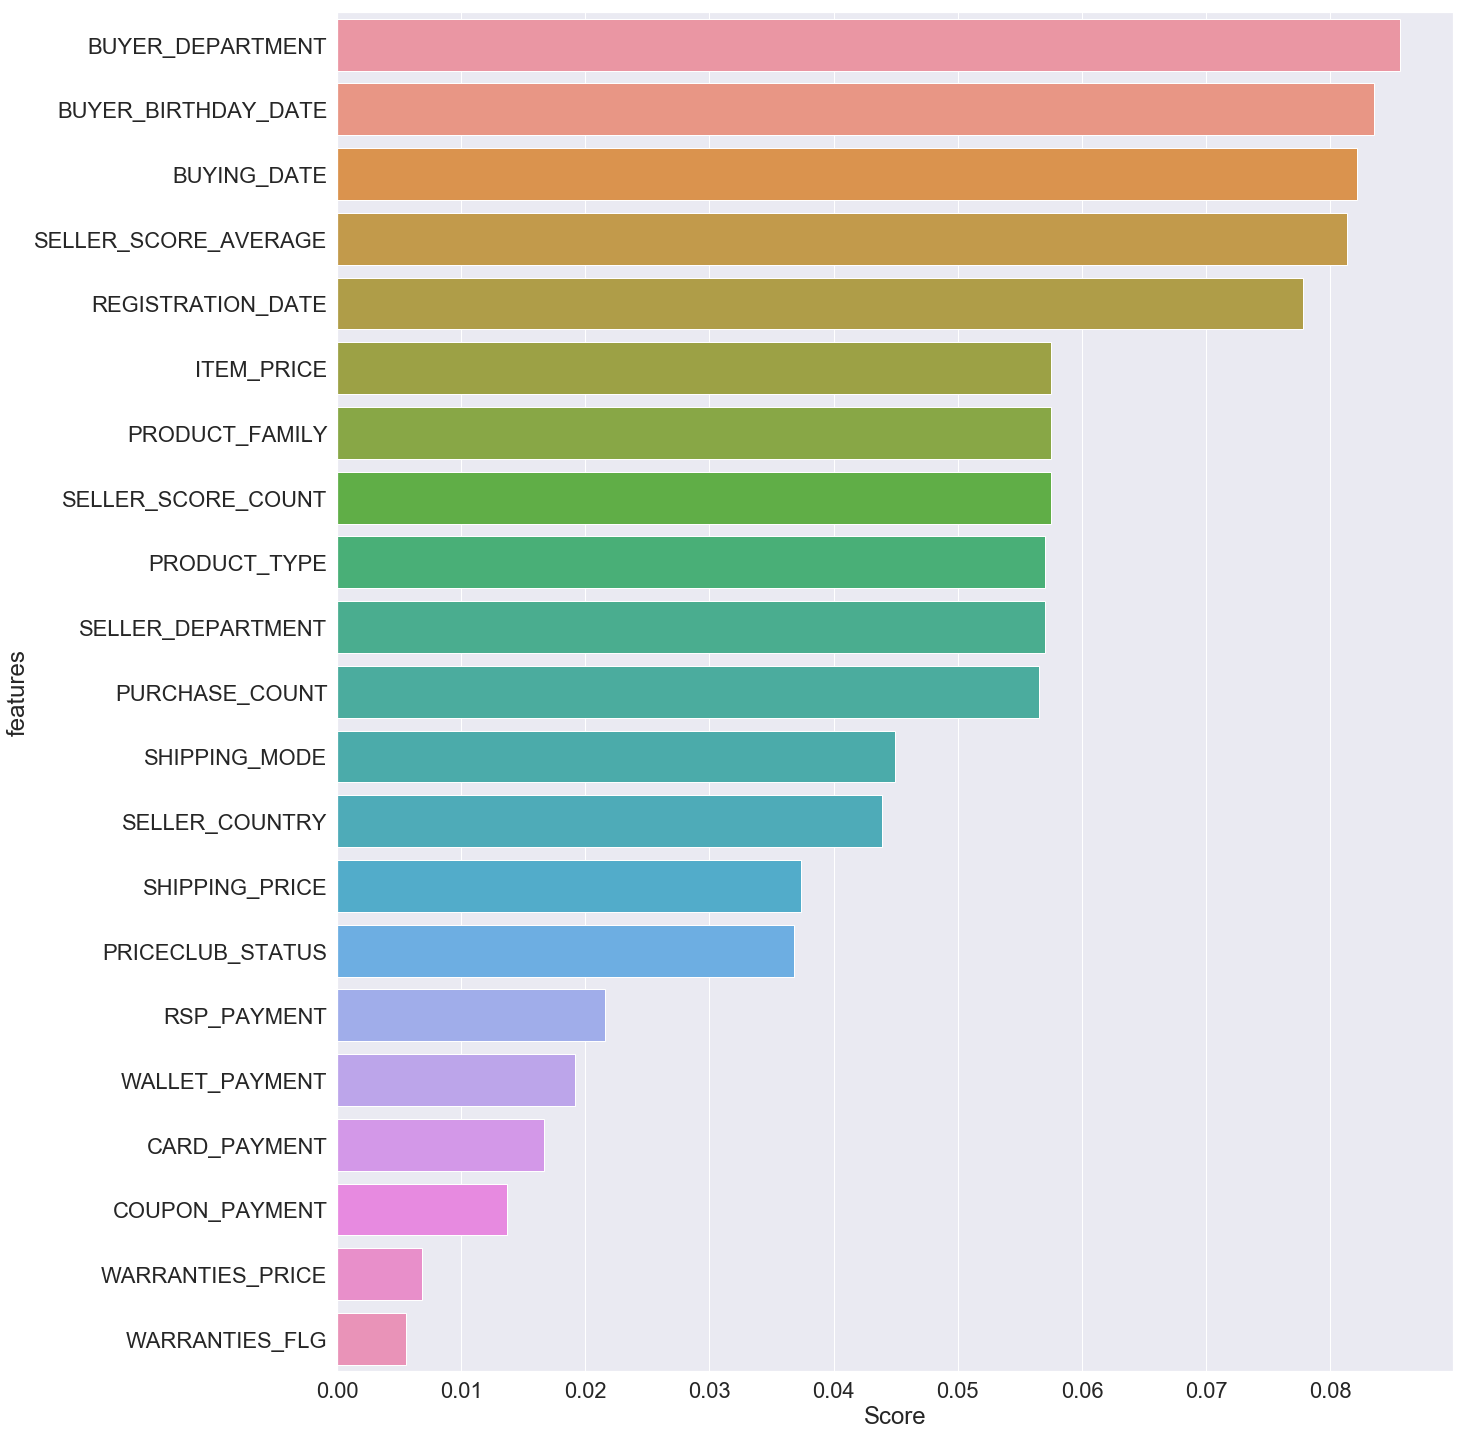

In [40]:
Multi.Feature_Importances_Tree(Multi_Train, Multi_Target, figsize = (20, 25), nb_features = 21)

In [24]:
Multi.Feature_Importances_Test(Multi_Train, Multi_Target, nb_features = 10)

,Features,f_classif
0,SELLER_SCORE_AVERAGE,17.216671
1,ITEM_PRICE,8.594897
2,SELLER_SCORE_COUNT,5.947787
3,SELLER_DEPARTMENT,3.133100
4,SHIPPING_MODE,2.481947
5,REGISTRATION_DATE,2.361468
6,SHIPPING_PRICE,2.288408
7,PURCHASE_COUNT,1.875314
8,BUYER_BIRTHDAY_DATE,1.792215
9,SELLER_COUNTRY,1.395068


In [25]:
Multi.get_highest_corr_target(Multi_Train, Multi_Target)

,features,Target Correlation
0,SELLER_SCORE_AVERAGE,0.199755
1,ITEM_PRICE,0.185426
2,PRODUCT_TYPE,0.135933
3,SHIPPING_PRICE,0.095060
4,SELLER_SCORE_COUNT,0.091340
5,WARRANTIES_PRICE,0.081010
6,PRODUCT_FAMILY,0.076133
7,SELLER_COUNTRY,0.072617
8,WARRANTIES_FLG,0.071631
9,PRICECLUB_STATUS,0.069498


In [26]:
Multi.get_highest_corr(Multi_Train)

,feature_1,feature_2,correlation_abs
0,WARRANTIES_FLG,WARRANTIES_PRICE,0.982630
1,WALLET_PAYMENT,CARD_PAYMENT,0.655717
2,RSP_PAYMENT,PRICECLUB_STATUS,0.540061
3,REGISTRATION_DATE,PURCHASE_COUNT,0.442369
4,SHIPPING_PRICE,SELLER_DEPARTMENT,0.374038
5,PRICECLUB_STATUS,PURCHASE_COUNT,0.360268
6,SELLER_SCORE_COUNT,SELLER_SCORE_AVERAGE,0.359478
7,PURCHASE_COUNT,RSP_PAYMENT,0.300264


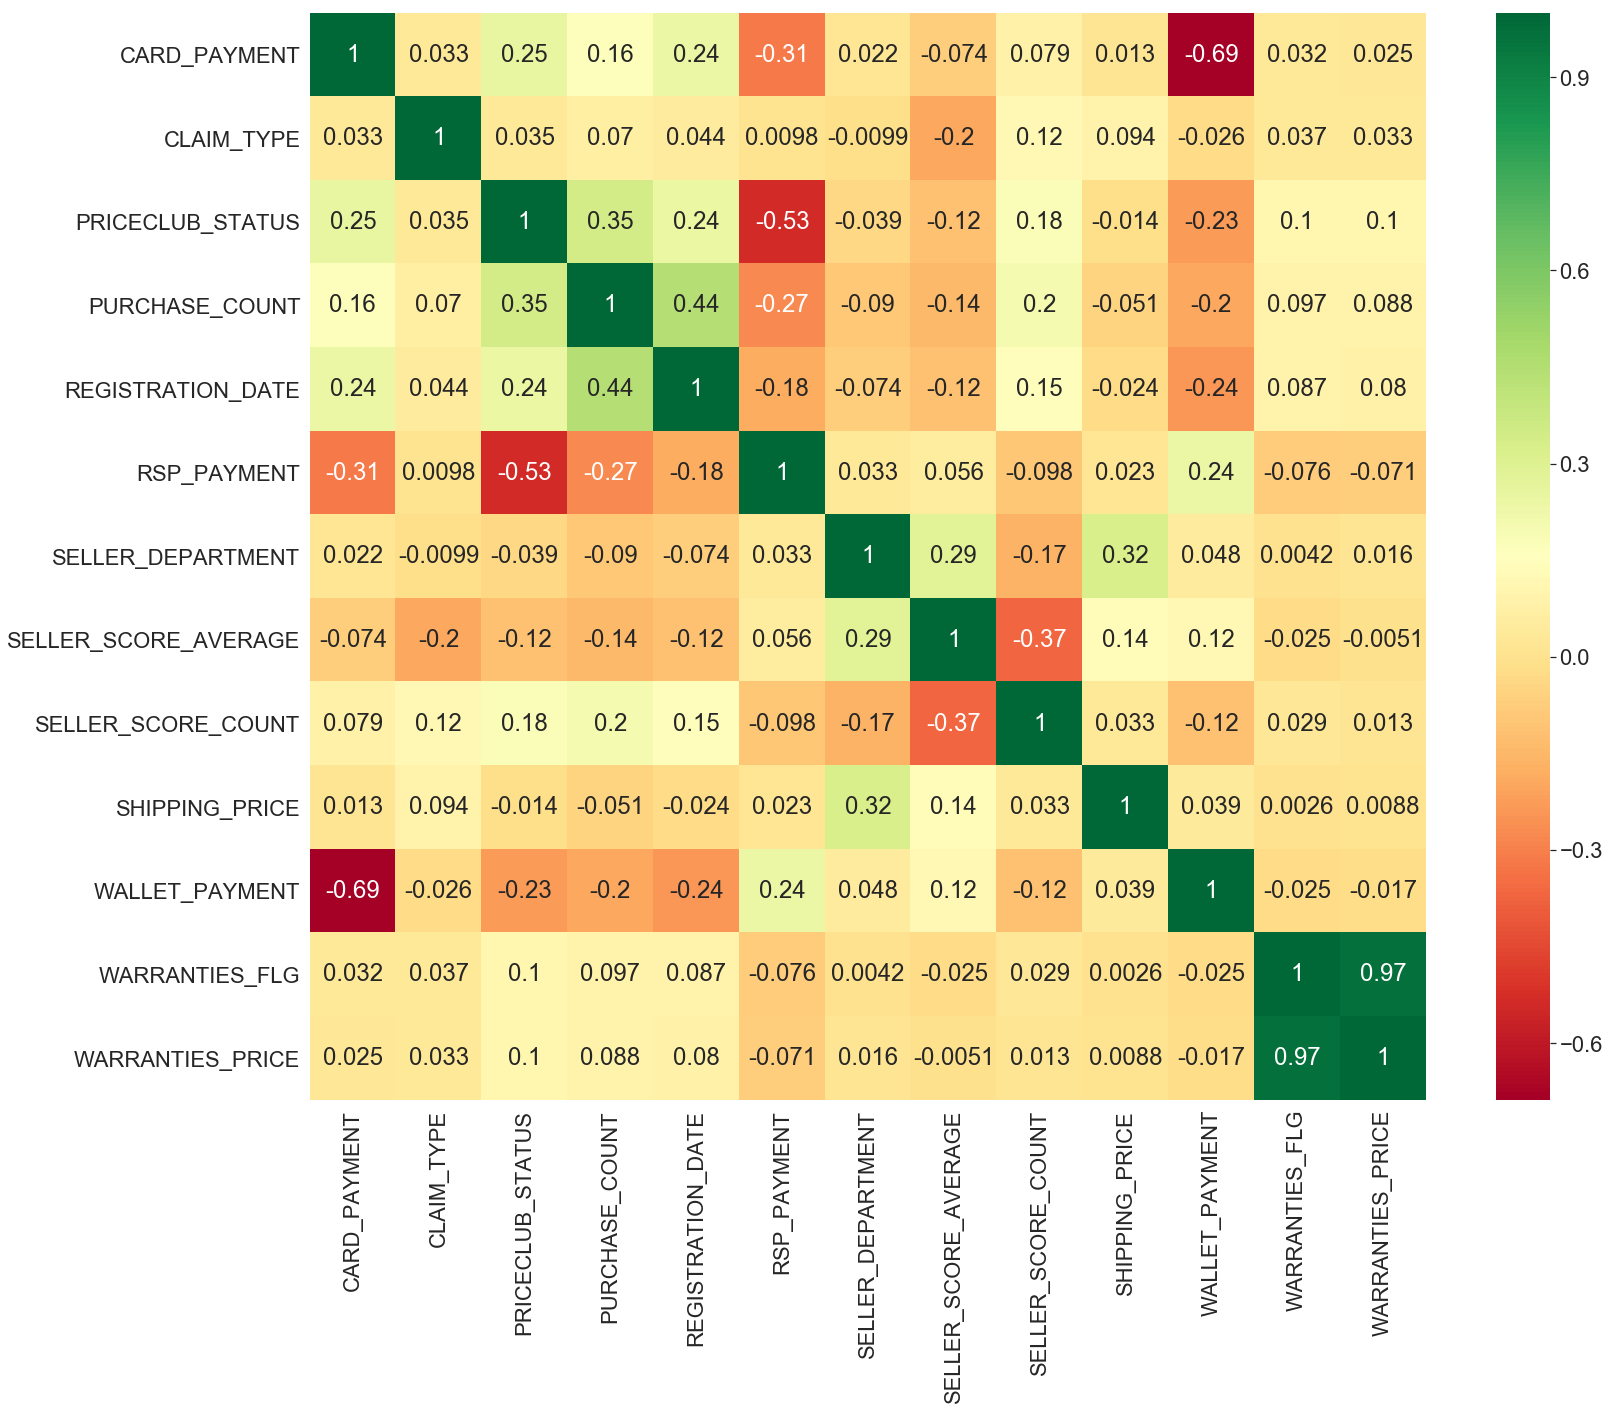

In [27]:
Multi.corr_mat(Multi_Train, Multi_Target, figsize = (25, 20))

### Bi catégorielle

C:\Users\jecombe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


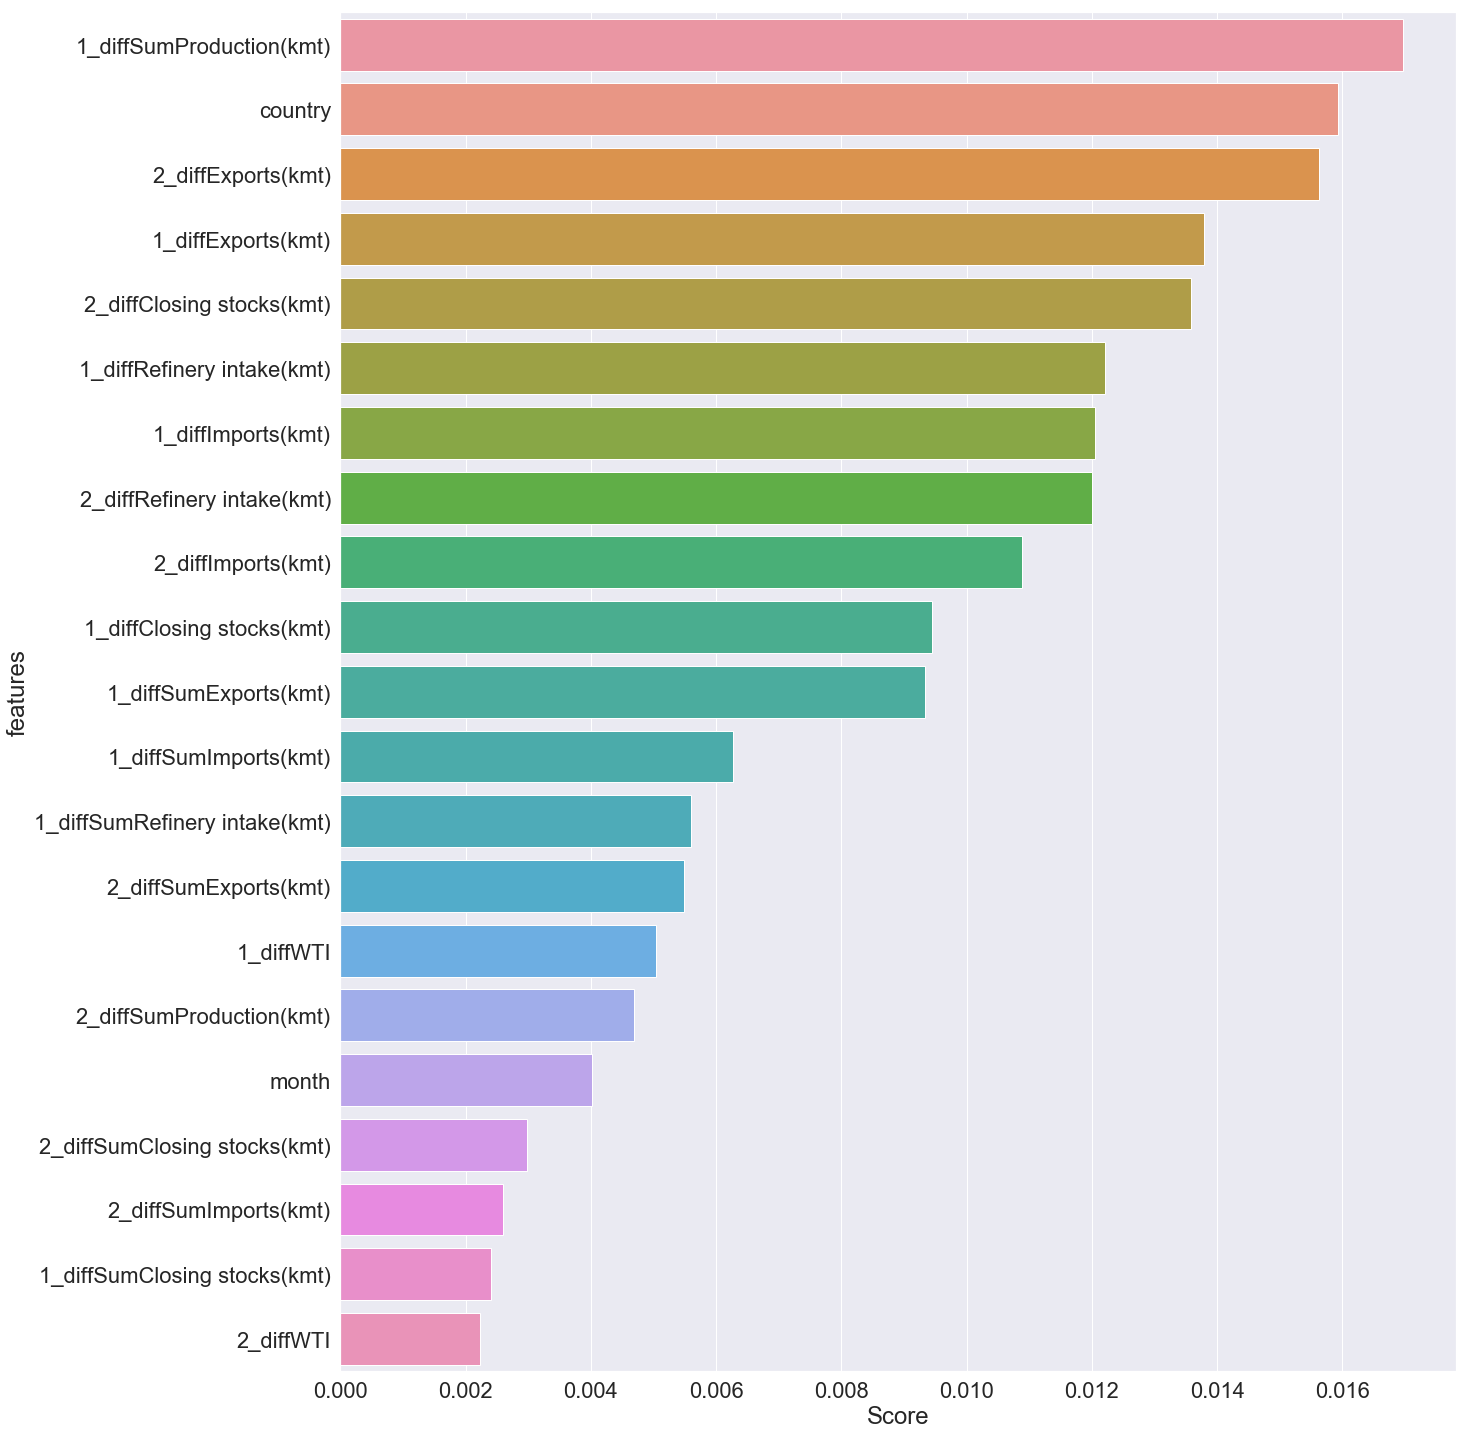

In [28]:
Bin = BestEstimator()
Bin.Feature_Importances_Tree(Bin_Train, Bin_Target, figsize = (20, 25), nb_features = 21)

In [29]:
Bin.Feature_Importances_Test(Bin_Train, Bin_Target, nb_features = 15)

,Features,f_classif
0,12_diffSumProduction(kmt),146.336336
1,1_diffSumProduction(kmt),121.752703
2,12_diffSumExports(kmt),111.591203
3,12_diffSumImports(kmt),99.773138
4,1_diffSumExports(kmt),98.068689
5,1_diffSumImports(kmt),63.935941
6,12_diffSumRefinery intake(kmt),60.839794
7,6_diffSumExports(kmt),46.713971
8,1_diffSumRefinery intake(kmt),42.337208
9,11_diffSumProduction(kmt),41.189402


In [30]:
Bin.get_highest_corr_target(Bin_Train, Bin_Target, nb_features = 15)

,features,Target Correlation
0,1_diffSumProduction(kmt),0.319453
1,12_diffSumProduction(kmt),0.318197
2,12_diffSumExports(kmt),0.290513
3,1_diffSumExports(kmt),0.288240
4,1_diffSumImports(kmt),0.241833
5,12_diffSumImports(kmt),0.229729
6,6_diffSumProduction(kmt),0.229719
7,6_diffSumExports(kmt),0.214255
8,12_diffSumRefinery intake(kmt),0.196704
9,1_diffSumRefinery intake(kmt),0.179490


In [31]:
Bin.get_highest_corr(Bin_Train, n_pairs = 5)

,feature_1,feature_2,correlation_abs
0,8_diffSumProduction(kmt),8_diffSumExports(kmt),0.835224
1,12_diffSumProduction(kmt),12_diffSumExports(kmt),0.834999
2,4_diffSumProduction(kmt),4_diffSumExports(kmt),0.833084
3,12_diffImports(kmt),12_diffRefinery intake(kmt),0.832893
4,10_diffSumExports(kmt),10_diffSumProduction(kmt),0.832499


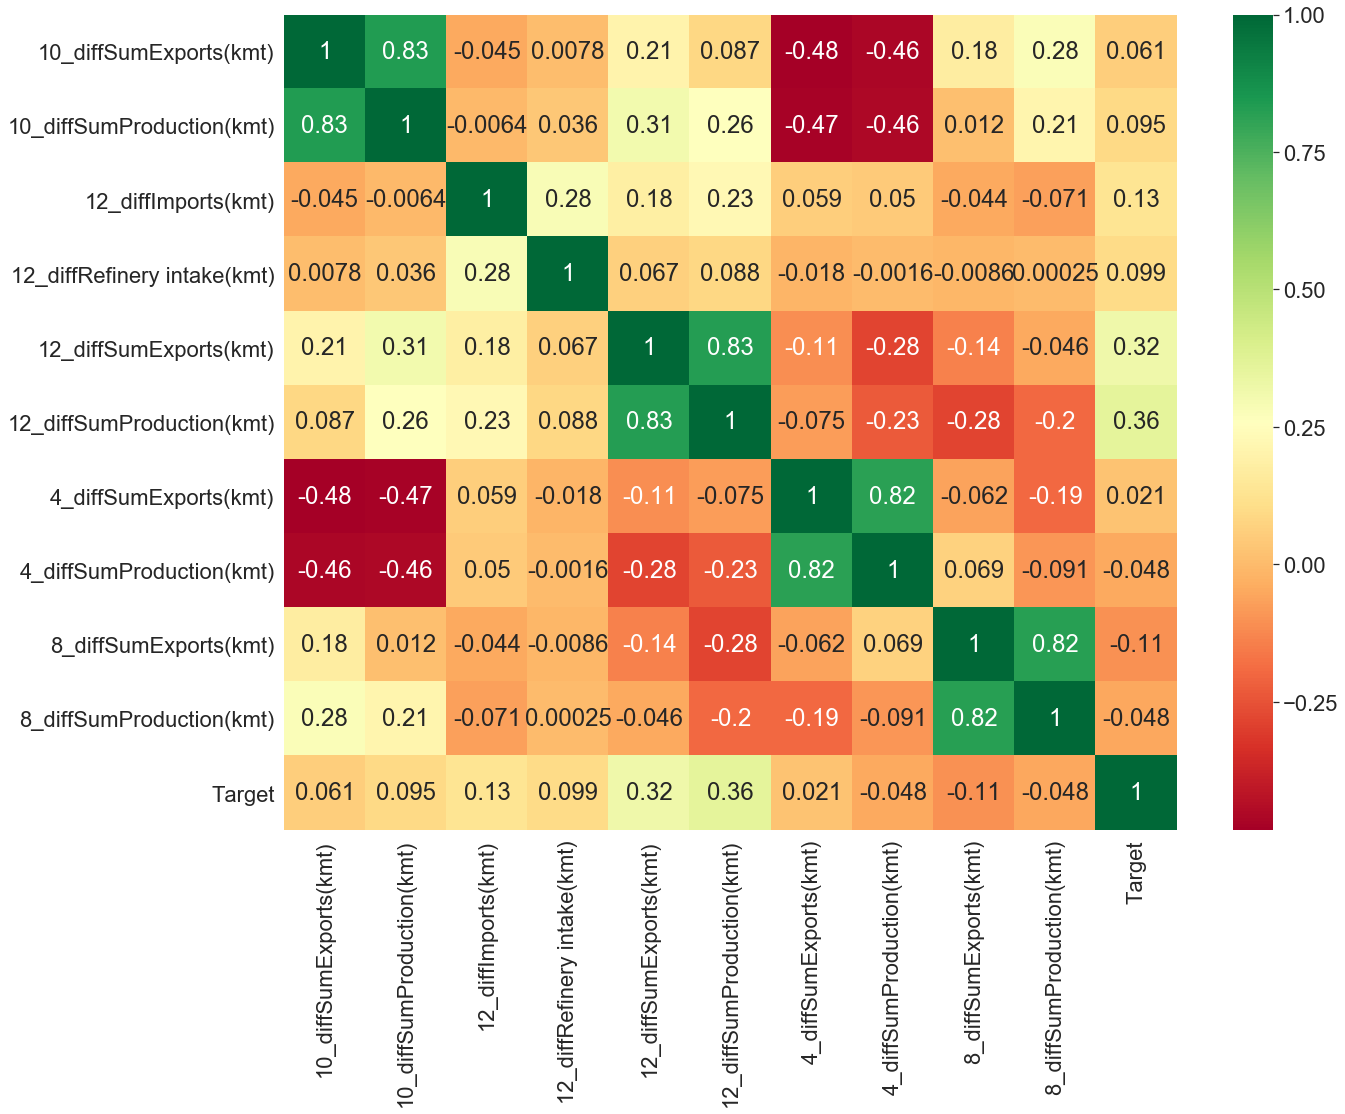

In [32]:
Bin.corr_mat(Bin_Train, Bin_Target, n_pairs = 5)

### Regression

C:\Users\jecombe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


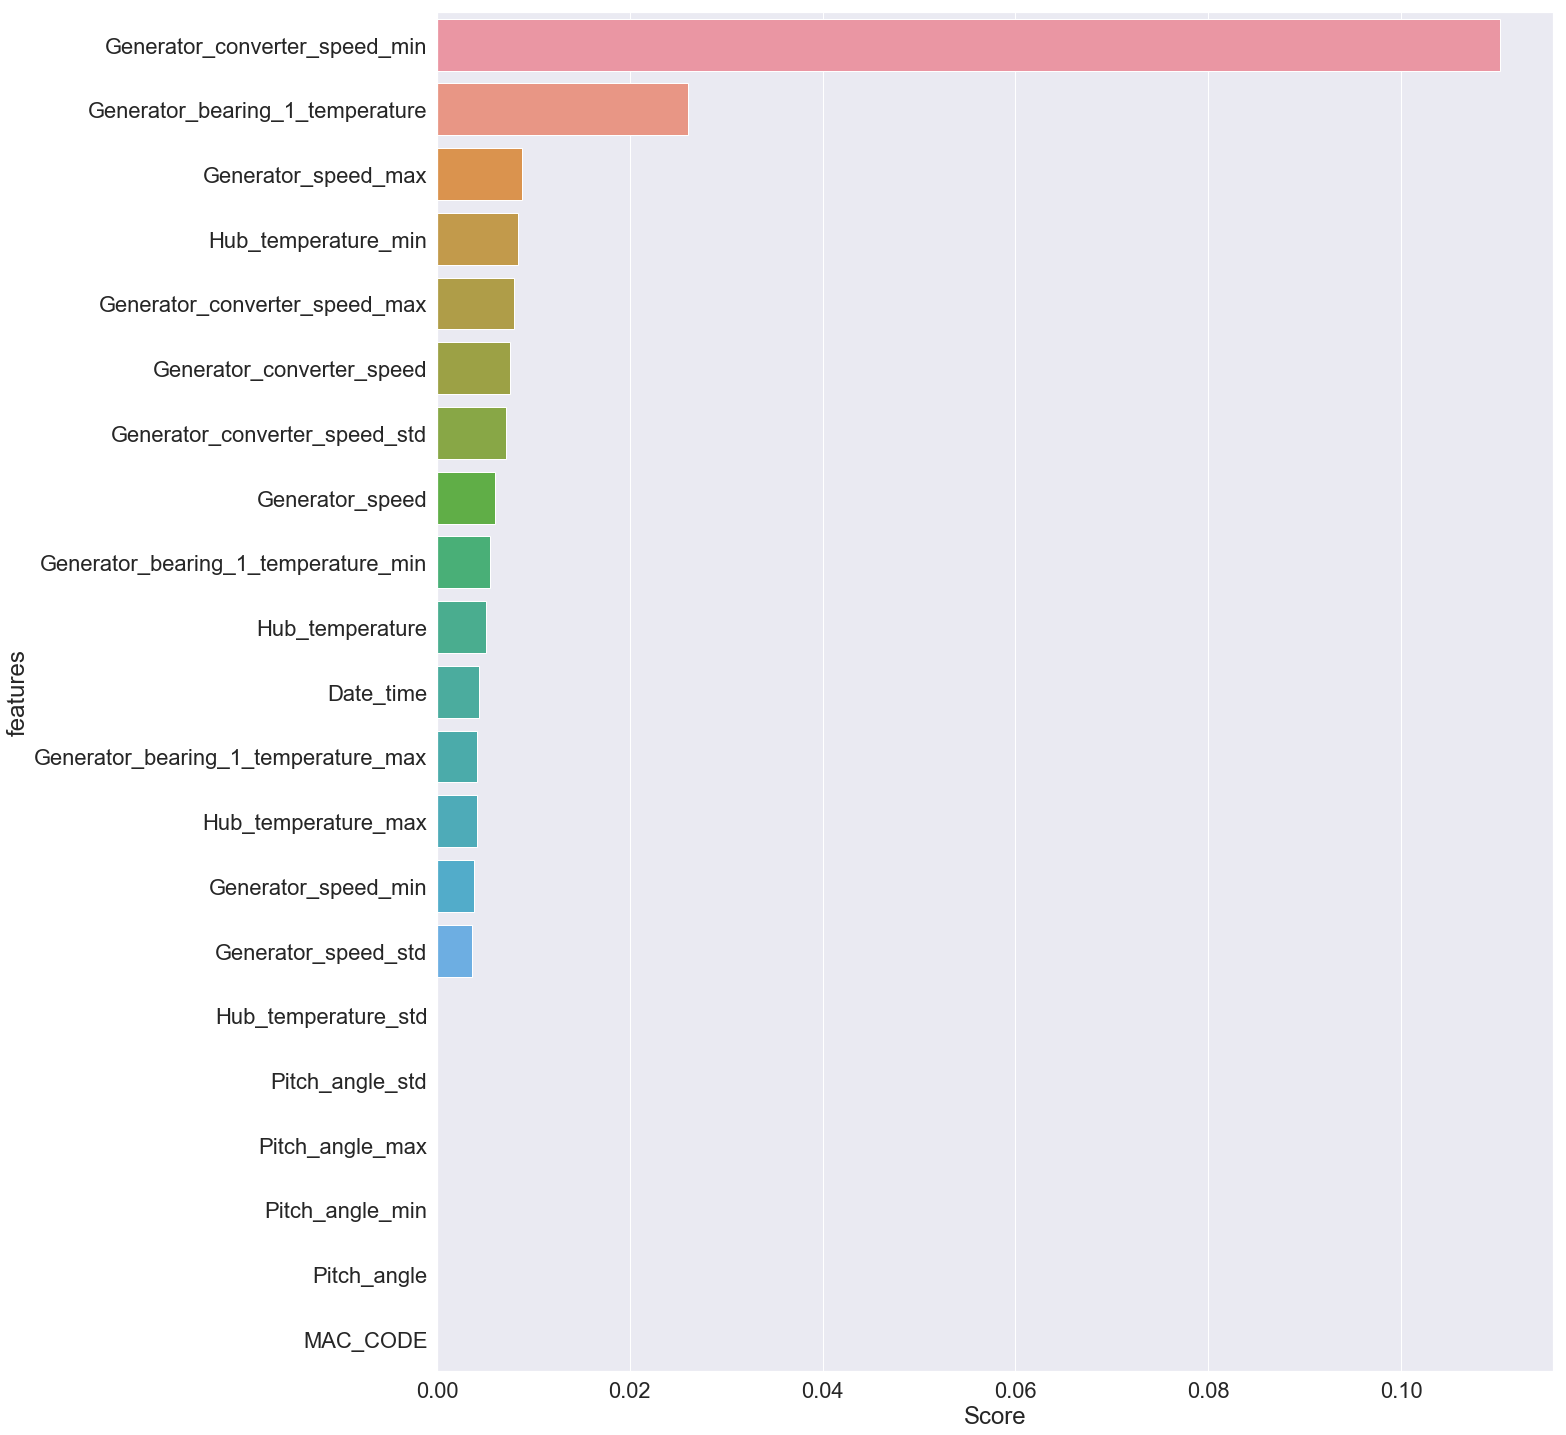

In [33]:
Reg = BestEstimator(type_esti = 'Regressor')

Reg.Feature_Importances_Tree(Reg_Train, Reg_Target, figsize = (20, 25), nb_features = 21)

In [34]:
Reg.Feature_Importances_Test(Reg_Train, Reg_Target, nb_features = 15, test_used = f_regression)

C:\Users\jecombe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\Users\jecombe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\jecombe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
C:\Users\jecombe\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\jecombe\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  r

,Features,f_regression
0,Hub_temperature_min,663.850371
1,Hub_temperature_max,656.398961
2,Hub_temperature,653.920041
3,Generator_stator_temperature,570.081934
4,Generator_stator_temperature_max,544.429652
5,Generator_stator_temperature_min,537.446555
6,Gearbox_bearing_1_temperature,535.215020
7,Generator_bearing_1_temperature,528.865244
8,Rotor_bearing_temperature,524.774921
9,Gearbox_bearing_1_temperature_min,521.869771


In [35]:
Reg.get_highest_corr_target(Reg_Train, Reg_Target, nb_features = 15)

C:\Users\jecombe\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Users\jecombe\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:5256: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


,features,Target Correlation
0,Hub_temperature_max,0.482884
1,Generator_bearing_1_temperature,0.461909
2,Hub_temperature_min,0.457066
3,Hub_temperature,0.455453
4,Generator_bearing_1_temperature_min,0.440655
5,Generator_bearing_2_temperature,0.439166
6,Generator_bearing_1_temperature_max,0.420218
7,Generator_bearing_2_temperature_min,0.405284
8,Generator_bearing_2_temperature_max,0.401882
9,Generator_converter_speed_min,0.398648


In [36]:
Reg.get_highest_corr(Reg_Train, n_pairs = 5)

,feature_1,feature_2,correlation_abs
0,Date_time,Date_time,1.000000
1,Grid_voltage_std,Grid_frequency_std,0.998295
2,Grid_frequency_min,Grid_voltage_min,0.998002
3,Grid_voltage_max,Grid_frequency_max,0.997610
4,Nacelle_angle_max,Nacelle_angle_min,0.997592


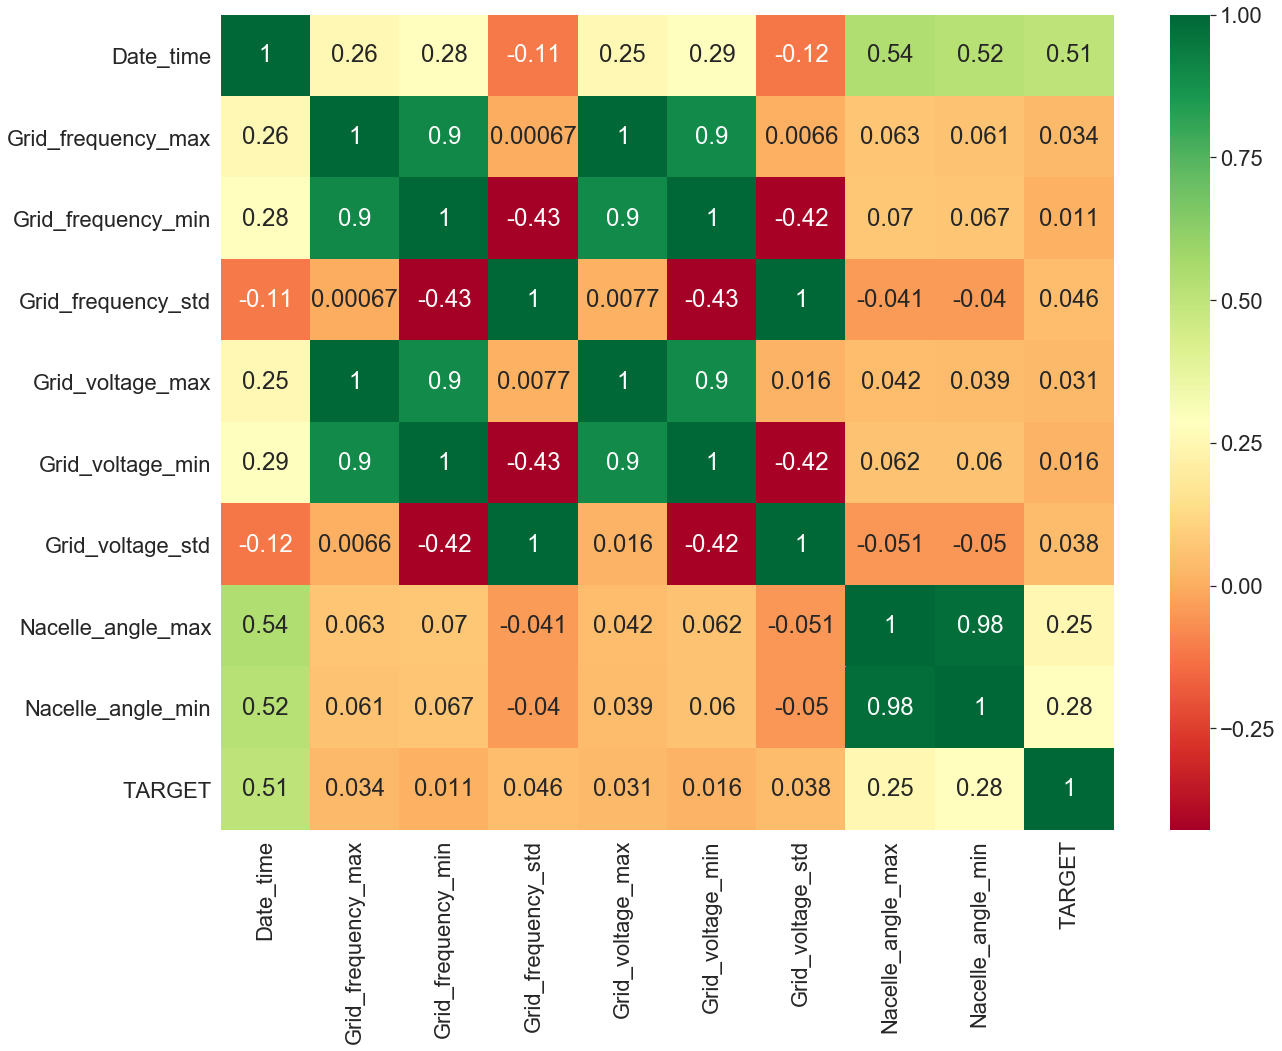

In [37]:
Reg.corr_mat(Reg_Train, Reg_Target, n_pairs = 5)